<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

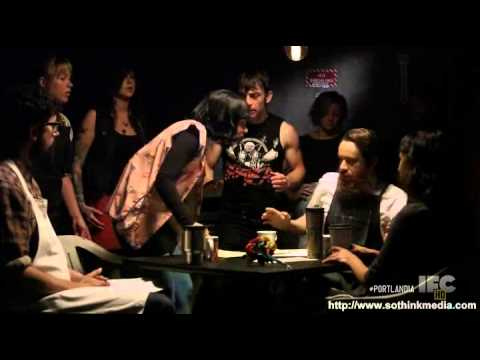

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [8]:
%pwd

'/Users/user/Documents/GitHub/Lambda/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [9]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [10]:
def df_val(df):
    for col in df.columns:
        print(df[col].groupby(shops["star_rating"]).value_counts().nlargest(3))

if __name__ == "__main__":
    df_val(shops)

star_rating        coffee_shop_name               
 5.0 star rating   Venezia Italian Gelato             176
                   The Factory - Cafe With a Soul     156
 4.0 star rating   Epoch Coffee                       149
Name: coffee_shop_name, dtype: int64
star_rating        full_review_text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

# **Token List**

In [1]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

tokenizer = Tokenizer(nlp.vocab)

In [14]:
for _ in shops["full_review_text"][:3]:
    print(_)

 11/25/2016 1 check-in Love love loved the atmosphere! Every corner of the coffee shop had its own style, and there were swings!!! I ordered the matcha latte, and it was muy fantastico! Ordering and getting my drink were pretty streamlined. I ordered on an iPad, which included all beverage selections that ranged from coffee to wine, desired level of sweetness, and a checkout system. I got my latte within minutes!  I was hoping for a typical heart or feather on my latte, but found myself listing out all the possibilities of what the art may be. Any ideas? 
 12/2/2016 Listed in Date Night: Austin, Ambiance in Austin BEAUTIFUL!!!! Love the ambiance! Instagram-worthy!!!  Definitely $$$, so be prepared. This is gonna cost you a pretty penny :) Waffle dessert was just decent...nothing to rave about.  But, will probably be back just to be somewhere unique and nice. 
 11/30/2016 1 check-in Listed in Brunch Spots I loved the eclectic and homey plush decor and who doesn't want to swing and drink

In [22]:
tokens = []
""" Make them tokens """
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=1000):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

shops['tokens'] = tokens

In [26]:
shops["tokens"].head()

0    [ , 11/25/2016, 1, check-in, Love, love, loved...
1    [ , 12/2/2016, Listed, in, Date, Night:, Austi...
2    [ , 11/30/2016, 1, check-in, Listed, in, Brunc...
3    [ , 11/25/2016, Very, cool, decor!, Good, drin...
4    [ , 12/3/2016, 1, check-in, They, are, located...
Name: tokens, dtype: object

In [30]:
from collections import Counter
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [31]:
wc = count(shops['tokens'])

In [32]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
28,the,6520,27779,1.0,0.034334,0.034334,0.856092
35,and,6804,25748,2.0,0.031824,0.066157,0.893382
48,,7616,22606,3.0,0.027940,0.094097,1.000000
8,a,6181,22085,4.0,0.027296,0.121394,0.811581
53,I,5469,19780,5.0,0.024447,0.145841,0.718093


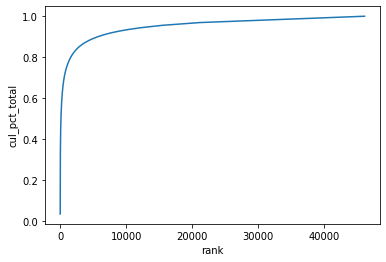

In [35]:
import seaborn as sns

# Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

In [39]:
wc_top30 = wc[wc['rank'] <= 30]['cul_pct_total'].max()
wc_top30

0.34270974567629936

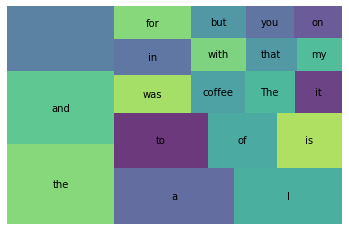

In [41]:
import squarify
import matplotlib.pyplot as plt

wc_top30 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top30['pct_total'], label=wc_top30['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [63]:
# list(nlp.Defaults.stop_words)[:10]

shops["tokens"].values

array([list([' ', '11/25/2016', '1', 'check-in', 'Love', 'love', 'loved', 'the', 'atmosphere!', 'Every', 'corner', 'of', 'the', 'coffee', 'shop', 'had', 'its', 'own', 'style,', 'and', 'there', 'were', 'swings!!!', 'I', 'ordered', 'the', 'matcha', 'latte,', 'and', 'it', 'was', 'muy', 'fantastico!', 'Ordering', 'and', 'getting', 'my', 'drink', 'were', 'pretty', 'streamlined.', 'I', 'ordered', 'on', 'an', 'iPad,', 'which', 'included', 'all', 'beverage', 'selections', 'that', 'ranged', 'from', 'coffee', 'to', 'wine,', 'desired', 'level', 'of', 'sweetness,', 'and', 'a', 'checkout', 'system.', 'I', 'got', 'my', 'latte', 'within', 'minutes!', ' ', 'I', 'was', 'hoping', 'for', 'a', 'typical', 'heart', 'or', 'feather', 'on', 'my', 'latte,', 'but', 'found', 'myself', 'listing', 'out', 'all', 'the', 'possibilities', 'of', 'what', 'the', 'art', 'may', 'be.', 'Any', 'ideas?']),
       list([' ', '12/2/2016', 'Listed', 'in', 'Date', 'Night:', 'Austin,', 'Ambiance', 'in', 'Austin', 'BEAUTIFUL!!!!', '

In [ ]:
def rm_stops(series):
    if series.isin(list(nlp.Defaults.stop_words)):
        print(series)
    
rm_stops(shops["tokens"])

In [83]:
tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

shops['tokens'] = tokens

In [84]:
shops["tokens"].head()

0    [ , 11/25/2016, 1, check-in, love, love, loved...
1    [ , 12/2/2016, listed, date, night:, austin,, ...
2    [ , 11/30/2016, 1, check-in, listed, brunch, s...
3    [ , 11/25/2016, cool, decor!, good, drinks, ni...
4    [ , 12/3/2016, 1, check-in, located, northcros...
Name: tokens, dtype: object

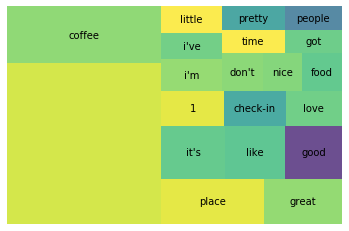

In [87]:
wc = count(shops['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [115]:
wc.head().word.iloc[0] == ' '

True

### Will remove stopwords "coffee" and "  "

In [116]:
print(type(nlp.Defaults.stop_words))

<class 'set'>


In [156]:
STOP_WORDS = nlp.Defaults.stop_words.union(["coffee",' ',"-","1","austin","it's","i'm","i've"])

In [157]:
tokens = []

for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
shops['tokens'] = tokens

In [158]:
wc = count(shops['tokens'])
wc.head(25)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
72,place,3029,4264,1.0,0.011120,0.011120,0.397715
82,great,2438,3250,2.0,0.008475,0.019595,0.320116
183,like,2034,2902,3.0,0.007568,0.027163,0.267069
193,good,2084,2779,4.0,0.007247,0.034410,0.273634
17,check-in,1957,1961,5.0,0.005114,0.039524,0.256959
13,love,1434,1806,6.0,0.004710,0.044233,0.188288
798,little,1230,1479,7.0,0.003857,0.048090,0.161502
311,don't,1133,1395,8.0,0.003638,0.051728,0.148766
179,nice,1188,1368,9.0,0.003567,0.055295,0.155987
410,food,1092,1363,10.0,0.003554,0.058850,0.143382


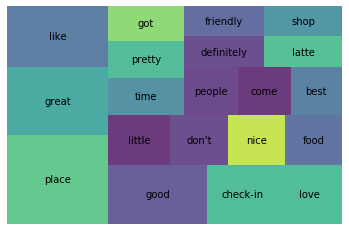

In [159]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [154]:
wc.tail(20)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
40463,delicious...and,1,1,40466.0,0.000003,0.999951,0.000131
40467,"(turkey,",1,1,40467.0,0.000003,0.999954,0.000131
40469,romaine,1,1,40468.0,0.000003,0.999956,0.000131
40471,"rib,",1,1,40469.0,0.000003,0.999959,0.000131
40466,"predictably,",1,1,40470.0,0.000003,0.999962,0.000131
40465,blts,1,1,40471.0,0.000003,0.999964,0.000131
40468,(+,1,1,40472.0,0.000003,0.999967,0.000131
40470,turkey),1,1,40473.0,0.000003,0.999969,0.000131
40472,(pork),1,1,40474.0,0.000003,0.999972,0.000131
40475,roomier,1,1,40475.0,0.000003,0.999974,0.000131


In [160]:
wc['appears_in_pct'].describe()

count    40482.000000
mean         0.001138
std          0.006382
min          0.000131
25%          0.000131
50%          0.000131
75%          0.000525
max          0.397715
Name: appears_in_pct, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


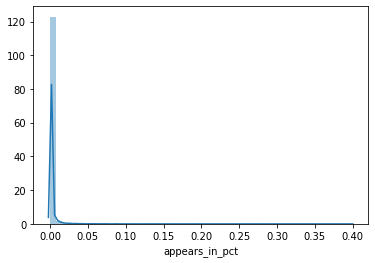

In [161]:
sns.distplot(wc['appears_in_pct']);

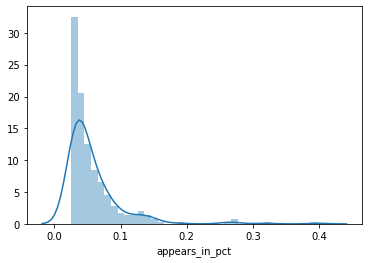

In [164]:
# Tree-Map w/ Words that appear in a least 2.0% of documents. 

wc = wc[wc['appears_in_pct'] >= 0.02]

sns.distplot(wc['appears_in_pct']);

### Stemming

In [165]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()

In [190]:
stems = []
for doc in shops["tokens"]:
    doc_stems = [ps.stem(word) for word in doc]
    stems.append(doc_stems)

shops["stems"] = stems

In [191]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,tokens,stems
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,"[11/25/2016, check-in, love, love, loved, atmo...","[11/25/2016, check-in, love, love, love, atmos..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,"[12/2/2016, listed, date, night:, austin,, amb...","[12/2/2016, list, date, night:, austin,, ambia..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,"[11/30/2016, check-in, listed, brunch, spots, ...","[11/30/2016, check-in, list, brunch, spot, lov..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,"[11/25/2016, cool, decor!, good, drinks, nice,...","[11/25/2016, cool, decor!, good, drink, nice, ..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,"[12/3/2016, check-in, located, northcross, mal...","[12/3/2016, check-in, locat, northcross, mall,..."


In [192]:
wc = count(shops['stems'])

In [195]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
68,place,3257,4769,1.0,0.012437,0.012437,0.427652
79,great,2441,3256,2.0,0.008491,0.020927,0.320509
175,like,2193,3193,3.0,0.008327,0.029254,0.287946
21,check-in,2979,2991,4.0,0.007800,0.037054,0.391150
185,good,2184,2935,5.0,0.007654,0.044708,0.286765


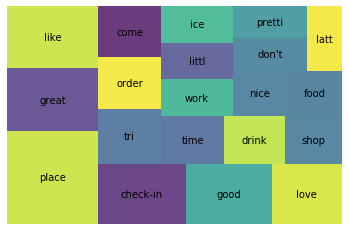

In [196]:
wc_top20 = wc[wc['rank'] <= 20]['cul_pct_total'].max()

import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [200]:
display(wc.head(),wc.tail())

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
68,place,3257,4769,1.0,0.012437,0.012437,0.427652
79,great,2441,3256,2.0,0.008491,0.020927,0.320509
175,like,2193,3193,3.0,0.008327,0.029254,0.287946
21,check-in,2979,2991,4.0,0.007800,0.037054,0.391150
185,good,2184,2935,5.0,0.007654,0.044708,0.286765


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
35953,actuality.,1,1,35956.0,0.000003,0.999990,0.000131
35955,crass.,1,1,35957.0,0.000003,0.999992,0.000131
35956,restrictions.,1,1,35958.0,0.000003,0.999995,0.000131
35957,"specially,",1,1,35959.0,0.000003,0.999997,0.000131
35958,"digestion,",1,1,35960.0,0.000003,1.000000,0.000131


In [201]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,tokens,stems
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,"[11/25/2016, check-in, love, love, loved, atmo...","[11/25/2016, check-in, love, love, love, atmos..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,"[12/2/2016, listed, date, night:, austin,, amb...","[12/2/2016, list, date, night:, austin,, ambia..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,"[11/30/2016, check-in, listed, brunch, spots, ...","[11/30/2016, check-in, list, brunch, spot, lov..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,"[11/25/2016, cool, decor!, good, drinks, nice,...","[11/25/2016, cool, decor!, good, drink, nice, ..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,"[12/3/2016, check-in, located, northcross, mal...","[12/3/2016, check-in, locat, northcross, mall,..."


In [248]:
shops_2 = shops.copy()

In [249]:
shops_2["star_rating"]= shops_2["star_rating"].str.replace("star rating","")

In [250]:
shops_2.head()

,coffee_shop_name,full_review_text,star_rating,tokens,stems
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0,"[11/25/2016, check-in, love, love, loved, atmo...","[11/25/2016, check-in, love, love, love, atmos..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0,"[12/2/2016, listed, date, night:, austin,, amb...","[12/2/2016, list, date, night:, austin,, ambia..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0,"[11/30/2016, check-in, listed, brunch, spots, ...","[11/30/2016, check-in, list, brunch, spot, lov..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0,"[11/25/2016, cool, decor!, good, drinks, nice,...","[11/25/2016, cool, decor!, good, drink, nice, ..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0,"[12/3/2016, check-in, located, northcross, mal...","[12/3/2016, check-in, locat, northcross, mall,..."


In [251]:
shops_2["star_rating"] = shops_2["star_rating"].astype('float')

In [256]:
shops_2["is_positive"] = shops_2["star_rating"] >= 3

In [257]:
shops_2.head()

,coffee_shop_name,full_review_text,star_rating,tokens,stems,is_positive
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0,"[11/25/2016, check-in, love, love, loved, atmo...","[11/25/2016, check-in, love, love, love, atmos...",True
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0,"[12/2/2016, listed, date, night:, austin,, amb...","[12/2/2016, list, date, night:, austin,, ambia...",True
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0,"[11/30/2016, check-in, listed, brunch, spots, ...","[11/30/2016, check-in, list, brunch, spot, lov...",True
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0,"[11/25/2016, cool, decor!, good, drinks, nice,...","[11/25/2016, cool, decor!, good, drink, nice, ...",False
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0,"[12/3/2016, check-in, located, northcross, mal...","[12/3/2016, check-in, locat, northcross, mall,...",True


In [258]:
wc = count(shops['stems'])

In [260]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
68,place,3257,4769,1.0,0.012437,0.012437,0.427652
79,great,2441,3256,2.0,0.008491,0.020927,0.320509
175,like,2193,3193,3.0,0.008327,0.029254,0.287946
21,check-in,2979,2991,4.0,0.007800,0.037054,0.391150
185,good,2184,2935,5.0,0.007654,0.044708,0.286765


In [261]:
wc.describe()

,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
count,35960.000000,35960.000000,35960.000000,35960.000000,35960.000000,35960.000000
mean,9.612458,10.663737,17980.500000,0.000028,0.918672,0.001262
std,57.845173,71.030659,10380.902177,0.000185,0.103020,0.007595
min,1.000000,1.000000,1.000000,0.000003,0.012437,0.000131
25%,1.000000,1.000000,8990.750000,0.000003,0.903348,0.000131
50%,1.000000,1.000000,17980.500000,0.000003,0.953113,0.000131
75%,4.000000,4.000000,26970.250000,0.000010,0.976557,0.000525
max,3257.000000,4769.000000,35960.000000,0.012437,1.000000,0.427652


In [268]:
# star_rating = []

# for i in range(len(wc["appears_in"])):
    
#     star_rating.append(shops_2["star_rating"][wc["appears_in"][i]]) 
    
# wc["star_rating"] = star_rating


wc["word"].contains


s[s.str.contains('|'.join(searchfor))]

In [ ]:
# # function to compute the average rating of all reviews containing a given lemma
# def avg_score(word):
#     score_list = []
#     for i in range(len(shops)):
#         if word in shops.iloc[i].lemmas:
#             score_list.append(shops.iloc[i].star_rating)
#     if score_list:
#         return sum(score_list)/len(score_list)
#     return 0

In [269]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct,star_rating
68,place,3257,4769,1.0,0.012437,0.012437,0.427652,4.0
79,great,2441,3256,2.0,0.008491,0.020927,0.320509,4.0
175,like,2193,3193,3.0,0.008327,0.029254,0.287946,5.0
21,check-in,2979,2991,4.0,0.007800,0.037054,0.391150,4.0
185,good,2184,2935,5.0,0.007654,0.044708,0.286765,4.0


skinni              1
regs.               1
congrat             1
else),              1
yellow              1
true,               1
antonio!            1
studebak            1
mac                 1
cappuccino.         1
are:                1
10p.m.              1
truck)              1
qc                  1
goooooooood         1
12/16/2015          1
detail.             1
inconsider          1
it).                1
starts,             1
mcdonald            1
ray                 1
patios),            1
shmear              1
crappi              1
prefer              1
12oz)               1
five                1
crispy,             1
ring!               1
                   ..
problem"            1
drug,               1
right:              1
studies).           1
subscrib            1
sucker!             1
usernam             1
changes.            1
indian)             1
dude"               1
baby!               1
related):           1
campus,             1
spotifi             1
cherrywood

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

